In [1]:
import os
import json
import gzip
import pandas as pd
!pwd

/home/nico/Desktop/Galvanize/capstone/Fancy_food_Recommender


In [2]:
### load the meta data

data = []
with gzip.open('../Grocery_and_Gourmet_Food.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

5074160
{'overall': 5.0, 'verified': True, 'reviewTime': '06 4, 2013', 'reviewerID': 'ALP49FBWT4I7V', 'asin': '1888861614', 'reviewerName': 'Lori', 'reviewText': 'Very pleased with my purchase. Looks exactly like the picture and will look great on my cake. It definitely will sparkle.', 'summary': 'Love it', 'unixReviewTime': 1370304000}


In [3]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

5074160


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074160 entries, 0 to 5074159
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   reviewerName    object 
 6   reviewText      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   vote            object 
 10  image           object 
 11  style           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 430.7+ MB


In [11]:
df[df['image'].notna()]
# 70935 actually have a link to the image to show. out of 5,074,160

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
168,1.0,True,"07 20, 2016",A1A3B0E21FCN0Q,5463213682,kyo,"I ordered Organo Gold Cafe Supreme, which is c...",As you can see the photo above and what was sh...,1468972800,2,[https://images-na.ssl-images-amazon.com/image...,NaN
310,3.0,True,"01 4, 2018",A2ZXKJXW7WQROL,9742356831,Lauren C,I wish it had more flavor than spice. I love T...,I wish it had more flavor than spice.,1515024000,NaN,[https://images-na.ssl-images-amazon.com/image...,NaN
451,5.0,True,"04 5, 2016",A3T0GBCA7RRFZ0,9742356831,Ana,"I love this curry paste, it's amazing! I am a...",So flavorful!,1459814400,28,[https://images-na.ssl-images-amazon.com/image...,NaN
625,5.0,True,"05 20, 2010",A2BIX2CIOFLM1W,B00004S1C5,MamaOfThree,I love these colors. You can mix them to get d...,Love these colors,1274313600,NaN,[https://images-na.ssl-images-amazon.com/image...,NaN
659,5.0,True,"04 15, 2013",ARKHAQFRXRVM2,B00004S1C5,Vero,This is not your ordinary food coloring. By f...,Just the Best!,1365984000,NaN,[https://images-na.ssl-images-amazon.com/image...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5074060,5.0,True,"03 27, 2018",A19LNCC3RRAHW8,B01HJ2UYH0,mindie,This packet of goodies is so cute!! It finishe...,This packet of goodies is so cute!! It ...,1522108800,NaN,[https://images-na.ssl-images-amazon.com/image...,NaN
5074061,5.0,True,"03 3, 2018",A2JBINCYCA94EG,B01HJ2UYH0,Gennie Woo,I had a request for arrows/teepee themed cupca...,High quality and cute,1520035200,NaN,[https://images-na.ssl-images-amazon.com/image...,NaN
5074083,5.0,True,"09 11, 2018",A5M7X5I6IMM6,B01HJ4FWGG,Laura,"Used these in our wedding treat bags, turned o...",Great for wedding gift bags,1536624000,NaN,[https://images-na.ssl-images-amazon.com/image...,{'Flavor:': ' Pink'}
5074115,2.0,True,"10 12, 2017",AHDO6UIU1Y68O,B01HJ4R980,Stacey,Cookies came broken in pieces.,Two Stars,1507766400,2,[https://images-na.ssl-images-amazon.com/image...,NaN


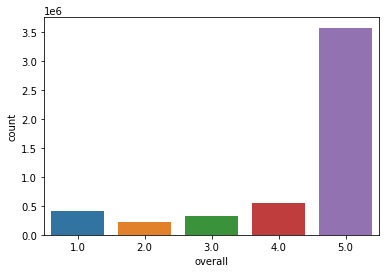

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.countplot(df['overall']) 
plt.show()

In [15]:

### load the meta data

meta = []
with gzip.open('../meta_Grocery_and_Gourmet_Food.json.gz') as f:
    for l in f:
        meta.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(meta))

# first row of the list
print(meta[0])

287051
{'category': ['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda'], 'tech1': '', 'description': ['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.'], 'fit': '', 'title': 'Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs', 'also_buy': [], 'image': [], 'tech2': '', 'brand': 'Ariola Imports', 'feature': [], 'rank': '165,181 in Grocery & Gourmet Food (', 'also_view': ['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY'], 'main_cat': 'Grocery', 'similar_item': '', 'date': '', 'price': '$41.91', 'asin': '0681727810'}


In [16]:
# convert list into pandas dataframe

meta_df = pd.DataFrame.from_dict(meta)

print(len(meta_df))



287051


In [21]:
### remove rows with unformatted title (i.e. some 'title' may still contain html style content)

df3 = meta_df.fillna('')
df4 = df3[df3.title.str.contains('getTime')] # unformatted rows
df5 = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

0
287051


In [22]:
df4

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details


In [23]:
df5

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",[https://images-na.ssl-images-amazon.com/image...,,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,
2,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,[Jazz up your cakes with a sparkling monogram ...,,Letter C - Swarovski Crystal Monogram Wedding ...,[],[],,Unik Occasions,[],"[>#669,941 in Kitchen & Dining (See Top 100 in...",[B07DXN65TF],Amazon Home,,"September 21, 2010",$29.95,1888861118,
3,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[Large Letter - Height 4.75""]",,Letter H - Swarovski Crystal Monogram Wedding ...,[],[],,Other,"[Large Letter - Height 4.75""]","[>#832,581 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$11.45,1888861517,
4,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[4.75""]",,Letter S - Swarovski Crystal Monogram Wedding ...,[],[],,Unik Occasions,"[4.75"" height]","[>#590,999 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$15.00,1888861614,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287046,"[Grocery & Gourmet Food, Jams, Jellies & Sweet...",,[Caffarel fruit jellies are a product of Italy...,,"Caffarel Fruit Jellies, Organic Assorted, 200 ...","[B01HULC3TC, B07C8L4NWL, B014UTG6D6, B01M3UOLAP]",[],,Caffarel,[],"369,384 in Grocery & Gourmet Food (",[],Grocery,,,,B01HJFBN9A,{' Product Dimensions: ': '11.8 x 4.7...
287047,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Hampton Creeks Just Mayo Truffle makes fancy ...,,"HAMPTON CREEK Spo Just Truffle Mayo, 12 Ounce","[B00WNAEX2Q, B071LD7PMJ, B01HJF6FRA, B072HG8GF...",[],,Hampton Creek,[],"113,710 in Grocery & Gourmet Food (",[],Grocery,,,$10.89,B01HJFC704,"{'Shipping Weight:': '12 ounces (', 'Domestic ..."
287048,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Nothing compares with the classically zesty f...,,"HAMPTON CREEK Just Ranch Dressing, 12 Fluid Ounce","[B071LD7PMJ, B00KOHNX6C, B00OVN2F64, B01HJEHE9...",[],,Hampton Creek,[],"21,731 in Grocery & Gourmet Food (",[],Grocery,,,$10.95,B01HJF6FRA,"{'Shipping Weight:': '10.4 ounces (', 'Domesti..."
287049,"[Grocery & Gourmet Food, Herbs, Spices & Seaso...",,[],,Gourmet Pure Vanilla Bean Pastes - Organically...,"[B00DUF219A, B01HJHX9ZO, B07K4K26PQ, B000H7ENQ...",[https://images-na.ssl-images-amazon.com/image...,,Heilala Vanilla,[],472 in Grocery & Gourmet Food (,[],Grocery,,,$14.97,B01HJHSVG6,"{'Shipping Weight:': '5.6 ounces (', 'ASIN: ':..."


In [30]:
# how those unformatted rows look like
df5.iloc[2]

category        [Grocery & Gourmet Food, Cooking & Baking, Fro...
tech1                                                            
description     [Jazz up your cakes with a sparkling monogram ...
fit                                                              
title           Letter C - Swarovski Crystal Monogram Wedding ...
also_buy                                                       []
image                                                          []
tech2                                                            
brand                                              Unik Occasions
feature                                                        []
rank            [>#669,941 in Kitchen & Dining (See Top 100 in...
also_view                                            [B07DXN65TF]
main_cat                                              Amazon Home
similar_item                                                     
date                                           September 21, 2010
price     

In [31]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287051 entries, 0 to 287050
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      287051 non-null  object
 1   tech1         287051 non-null  object
 2   description   287051 non-null  object
 3   fit           287051 non-null  object
 4   title         287051 non-null  object
 5   also_buy      287051 non-null  object
 6   image         287051 non-null  object
 7   tech2         287051 non-null  object
 8   brand         287051 non-null  object
 9   feature       287051 non-null  object
 10  rank          287051 non-null  object
 11  also_view     287051 non-null  object
 12  main_cat      287051 non-null  object
 13  similar_item  287051 non-null  object
 14  date          287051 non-null  object
 15  price         287051 non-null  object
 16  asin          287051 non-null  object
 17  details       287051 non-null  object
dtypes: object(18)
memory usa

In [41]:
df5.columns
df5.drop([]'tech1',])

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'image',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'details'],
      dtype='object')

# hello


# so for products we have 
category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'image',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'details'


reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a dictionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product

to do
change the name overall to rating
change the name reviewText to review
change the name summary to review_summary

think about style, summary, reviewTime, image, unixReview time, drop these for now. 


so someone write a text and I find the one that is most similar to it and then jsut display the title of that one and the link to the page with the asin. - maybe even the review that is similar. 

second tab you click words that relate to what you want. cheap, expensive, wet, dry, alchol, cheese, 

### 

In [32]:
# find out all products whose title includes a specified term uses json not pandas though
cands = []
cands2 = []
for d in meta:
    if 'title' in d and 'cheese' in d['title'].lower():
        cands.append(d)
    if 'title' in d and 'french' in d['title'].lower():
        cands2.append(d)

print(len(cands))
print(len(cands2))

4737
2899


In [33]:
# show some example products
for d in cands[:10]:
    print(d['title'])

Blue Cheese Assortment (30 ounce)
Igourmet French Cheese Assortment, 1.8-Pound
Irish Cheese Assortment (30 ounce)
Dutch Cheese Assortment (1.8 pound)
English Cheese Assortment (2 pound)
Selection of Sheep's Milk Cheeses (1.5 pound)
igourmet's Favorites - 4 Cheese Sampler (30 ounce)
igourmet's Favorites - 8 Cheese Sampler (56 ounce)
Igourmet Oktoberfest Cheese Assortment, 2-Pound
Spanish Cheese Assortment 2 Pound Hand Cut Imported from Spain


In [34]:
# build asin set
cands_asin = set([d['asin'] for d in cands])
cands2_asin = set([d['asin'] for d in cands2])
len(cands_asin)

4680

In [38]:
from collections import defaultdict
# align products with reviews
reviews = defaultdict(list)
for l in meta:
    r = l
    a = r['asin']
    if a in cands_asin:
        reviews[a].append(r)